## Les fonctions on va apprendre:
- df.rolling(n).mean()
- plt.plot()

### Exigences : formulation d'une stratégie de moyenne mobile double

 - Utilisez le package tushare pour obtenir les données historiques du marché d'une action

In [1]:
import tushare as ts
import numpy as np
import pandas as pd
df = ts.get_k_data(code = '600519',start = '2018-01-01')
df

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


/home/haotian/anaconda3/lib/python3.10/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
/home/haotian/anaconda3/lib/python3.10/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
/home/haotian/anaconda3/lib/python3.10/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


,date,open,close,high,low,volume,code
0,2018-01-02,594.559,598.409,604.719,584.449,49612.0,600519
1,2018-01-03,596.059,610.419,615.959,594.299,52019.0,600519
2,2018-01-04,615.959,631.629,638.059,613.889,72205.0,600519
3,2018-01-05,635.559,632.919,640.589,622.779,39989.0,600519
4,2018-01-08,629.579,646.689,651.059,629.579,52204.0,600519
...,...,...,...,...,...,...,...
1327,2023-06-21,1740.000,1735.830,1756.600,1735.000,17721.0,600519
1328,2023-06-26,1720.110,1709.000,1730.000,1695.000,23993.0,600519
1329,2023-06-27,1709.990,1711.050,1719.700,1700.090,15174.0,600519
1330,2023-06-28,1713.180,1728.380,1734.000,1711.000,18574.0,600519


In [2]:
df.to_csv('action600519.csv')

In [3]:
df = pd.read_csv('./action600519.csv').set_index('date').drop(labels='Unnamed: 0',axis = 1)

In [4]:
df

,open,close,high,low,volume,code
date,,,,,,
2018-01-02,594.559,598.409,604.719,584.449,49612.0,600519
2018-01-03,596.059,610.419,615.959,594.299,52019.0,600519
2018-01-04,615.959,631.629,638.059,613.889,72205.0,600519
2018-01-05,635.559,632.919,640.589,622.779,39989.0,600519
2018-01-08,629.579,646.689,651.059,629.579,52204.0,600519
...,...,...,...,...,...,...
2023-06-21,1740.000,1735.830,1756.600,1735.000,17721.0,600519
2023-06-26,1720.110,1709.000,1730.000,1695.000,23993.0,600519
2023-06-27,1709.990,1711.050,1719.700,1700.090,15174.0,600519


### Calculez la moyenne mobile sur 5 jours et la moyenne mobile sur 30 jours des données historiques de l'action.
#### C'est quoi la moyenne mobile? 
- Pour chaque jour de bourse, la moyenne mobile des N jours précédents peut être calculée, puis ces moyennes mobiles peuvent être connectées pour former une ligne, appelée moyenne mobile de N jours. Les lignes de moyenne mobile couramment utilisées ont des indicateurs de 5 jours, 10 jours, 30 jours, 60 jours, 120 jours et 240 jours.
- 5 jours et 10 jours sont des indicateurs de référence pour les opérations à court terme, appelés indicateurs de moyenne mobile journalière.
- Les moyennes mobiles sur 30 et 60 jours sont des moyennes mobiles à moyen terme, appelées moyennes mobiles trimestrielles.
- Les moyennes mobiles sur 120 et 240 jours sont des moyennes mobiles à long terme, appelées moyennes mobiles annuelles.
- Méthode de calcul de la moyenne mobile : MA = (C1 + C2 + ...... + Cn)/N
* C : Cours de clôture un certain jour
* N : période moyenne mobile
    

In [5]:
ma5 = df['close'].rolling(5).mean()
ma5.head(10)

date
2018-01-02        NaN
2018-01-03        NaN
2018-01-04        NaN
2018-01-05        NaN
2018-01-08    624.013
2018-01-09    639.747
2018-01-10    653.717
2018-01-11    661.265
2018-01-12    671.277
2018-01-15    677.925
Name: close, dtype: float64

In [6]:
ma30 = df['close'].rolling(30).mean()
ma30.head(30)

date
2018-01-02           NaN
2018-01-03           NaN
2018-01-04           NaN
2018-01-05           NaN
2018-01-08           NaN
2018-01-09           NaN
2018-01-10           NaN
2018-01-11           NaN
2018-01-12           NaN
2018-01-15           NaN
2018-01-16           NaN
2018-01-17           NaN
2018-01-18           NaN
2018-01-19           NaN
2018-01-22           NaN
2018-01-23           NaN
2018-01-24           NaN
2018-01-25           NaN
2018-01-26           NaN
2018-01-29           NaN
2018-01-30           NaN
2018-01-31           NaN
2018-02-01           NaN
2018-02-02           NaN
2018-02-05           NaN
2018-02-06           NaN
2018-02-07           NaN
2018-02-08           NaN
2018-02-09           NaN
2018-02-12    640.480333
Name: close, dtype: float64

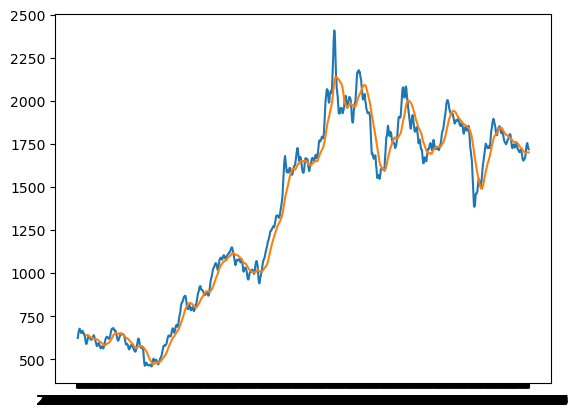

In [7]:
import matplotlib.pyplot as plt
plt.plot(ma5)
plt.plot(ma30)

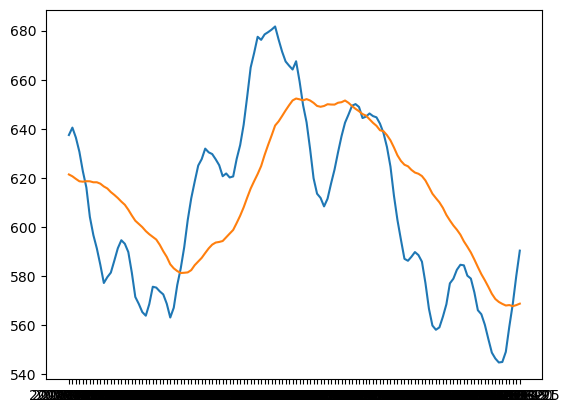

In [8]:
plt.plot(ma5[50:180])
plt.plot(ma30[50:180])